<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/Yet_another_copy_of_Neural_Network_Models_October_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score# importing package for model evaluation
uploaded=files.upload()#C:\Users\USER\OneDrive\Desktop\nakato research\Objective 1 Content\Dataset building\DATASET FOR MODELING HHV\HHV_DATASET_DRY.csv

In [ ]:
data = pd.read_csv('HHV_DATASET_DRY_final_2.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
data.head()

,Unnamed: 0,Biomass,ASH,VM,FC,C,H,O,N,S,Cel,Hem,Lig,HHV (MJ/kg),LHV (MJ/kg),Source
0,1.,Alfalfa Stem,5.27,78.92,15.81,47.17,6.00,38.19,2.68,0.20,NaN,NaN,NaN,18.67,NaN,[1]
1,2.,alfalfa (lucern),9.40,73.9,16.7,45.00,6.00,36.90,2.50,2.00,NaN,NaN,NaN,18.60,NaN,[2]
2,3.,alfalfa seed straw,7.25,72.6,20.15,46.76,5.40,40.72,1.00,0.02,NaN,NaN,NaN,18.45,NaN,[2]
3,4.,cotton gin trash,17.60,67.3,15.1,39.59,5.26,36.38,2.09,NaN,20.0,9.1,17.6,16.42,NaN,[2]
4,5.,cotton gin waste,9.36,82.16,8.48,49.03,4.71,35.08,1.45,0.36,77.8,16.0,0,16.27,NaN,[2]


In [ ]:
#drop unnamed columns
#data = data.drop(columns=['Unnamed: 14'])
#drop unnamed column
data = data.drop(columns=['Unnamed: 0'])
#drop biomass with NAN
#data = data.dropna(subset=['Biomass'])

In [ ]:
#data.head()
#count missing values
data.isnull().sum()
#compute percentage
data.isnull().sum()/len(data)*100
#display recouds with empty source column
#DISPLAY SOURCE WITH nan
#print(data['Source'].isna())

,0
Biomass,2.247191
ASH,2.621723
VM,8.614232
FC,8.614232
C,2.996255
H,5.617978
O,5.617978
N,5.992509
S,25.842697
Cel,21.722846


In [ ]:
#lets drop the LVH column
data = data.drop(columns=['LHV (MJ/kg)'])

In [ ]:
# Assuming 'data' is your DataFrame
cols_to_convert = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Explanation:

sns.jointplot(): This function creates the joint probability distribution plot.
kind='kde': We use kind='kde' to generate a kernel density estimation plot, which shows the distribution of the data as smooth contours. This is better for visualizing outliers compared to a scatter plot or a hexbin plot.
Outlier Visualization: The isolated contours in the plot will indicate the presence of outliers. These are points that are far away from the main concentration of the data.

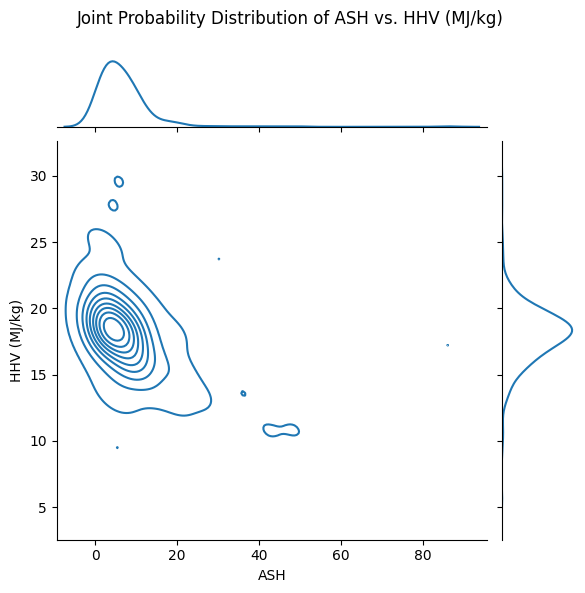

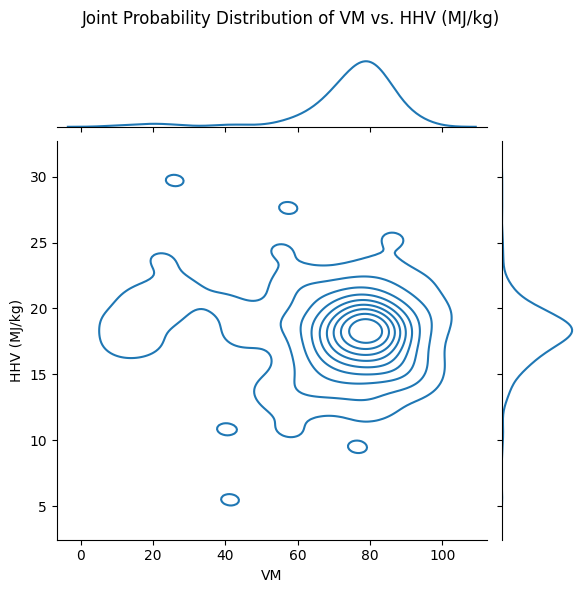

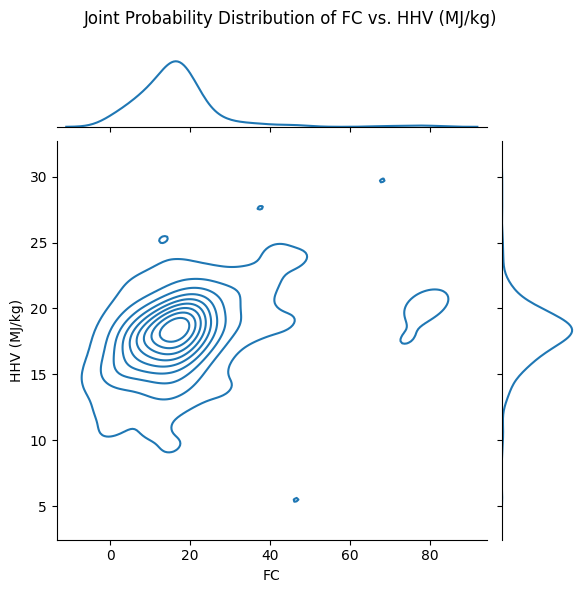

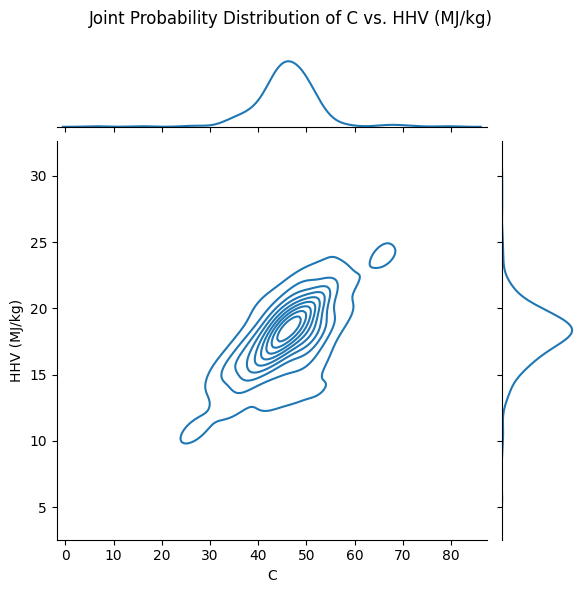

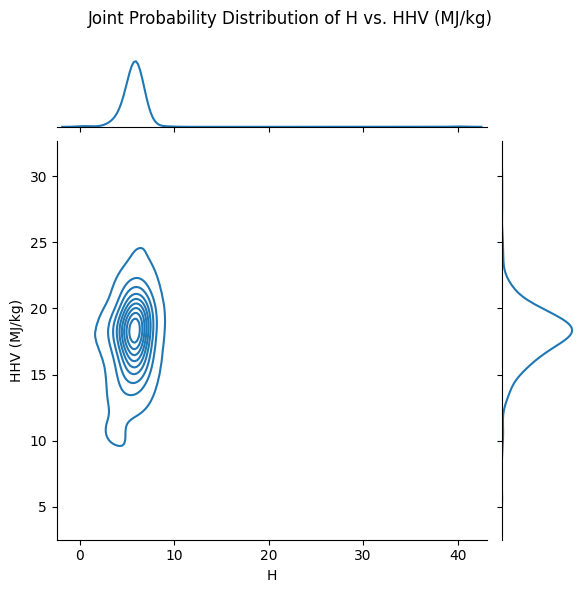

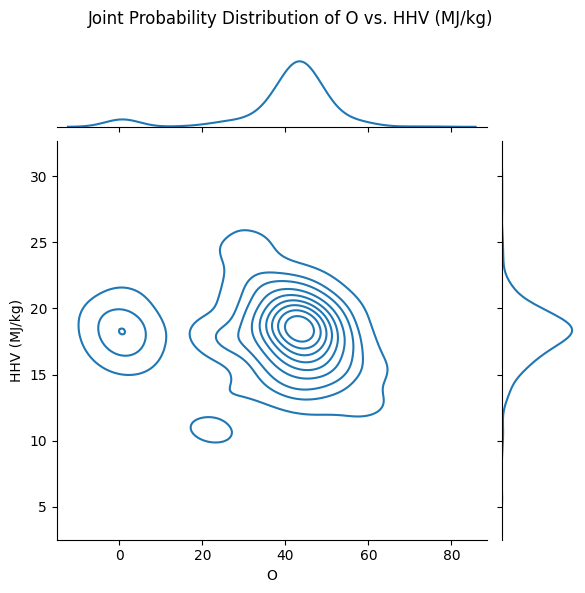

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O']

for column in columns_to_plot:
    g = sns.jointplot(x=column, y='HHV (MJ/kg)', data=data, kind='kde')
    g.fig.suptitle(f'Joint Probability Distribution of {column} vs. HHV (MJ/kg)')
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to prevent title cutoff
    plt.show()

**To mitigate the influence of outliers**, a z-score based approach was employed. Z-scores were calculated for each parameter, and data points with z-scores exceeding ±3, indicating significant deviation from the mean, were identified as outliers and replaced with the parameter's mean, calculated excluding the outliers. This strategy aimed to minimize outlier impact on subsequent analyses while preserving overall dataset characteristics, contributing to more robust and accurate results.

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and
# columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Calculate z-scores for each column
for column in columns_to_check:
    data[column + '_zscore'] = (data[column] - data[column].mean()) / data[column].std()

    # Replace outliers with the mean
    # Flag and replace outliers with the mean of the column
    outliers_mask = (data[column + '_zscore'] > 3) | (data[column + '_zscore'] < -3)  # Identify outliers

    # Replace outlier values with the column mean (excluding outliers)
    column_mean_without_outliers = data[column][~outliers_mask].mean()
    data.loc[outliers_mask, column] = column_mean_without_outliers

    # Drop z-score column (optional)
    data = data.drop(columns=[column + '_zscore'])

# Now 'data' has outliers replaced with column means

**Handling missing Values**

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

columns_to_impute = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute, index=data.index)

# Normalize to ensure ASH + VM + FC = 100
data_imputed[['ASH', 'VM', 'FC']] = data_imputed[['ASH', 'VM', 'FC']].div(data_imputed[['ASH', 'VM', 'FC']].sum(axis=1), axis=0) * 100

# Normalize to ensure S + H + C + O + N = 100
data_imputed[['S', 'H', 'C', 'O', 'N']] = data_imputed[['S', 'H', 'C', 'O', 'N']].div(data_imputed[['S', 'H', 'C', 'O', 'N']].sum(axis=1), axis=0) * 100

# Replace original columns with imputed and adjusted values
data[columns_to_impute] = data_imputed[columns_to_impute]

# Now 'data' has missing values filled using KNN imputation and sums adjusted to 100


**Regression Plots:**
Purpose: To visualize the relationship between two variables and identify potential predictors (features) for your target variable (HHV in this case). Reasoning: By observing the trend and scatter of points in the regression plot, you can get an idea of the strength and direction of the relationship between the two variables. A clear trend suggests a strong predictive relationship.

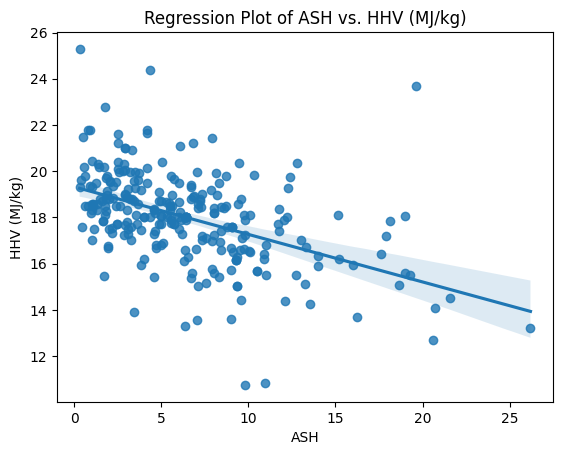

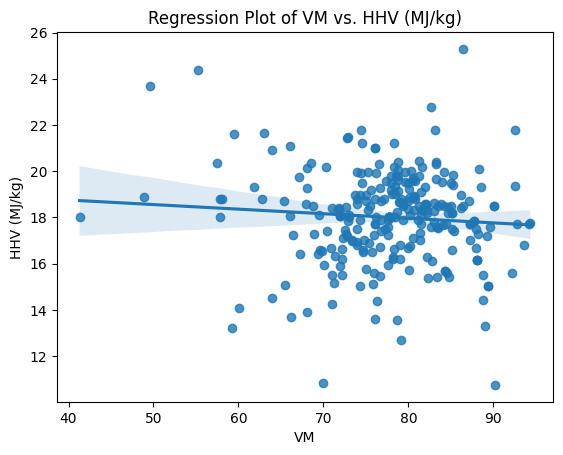

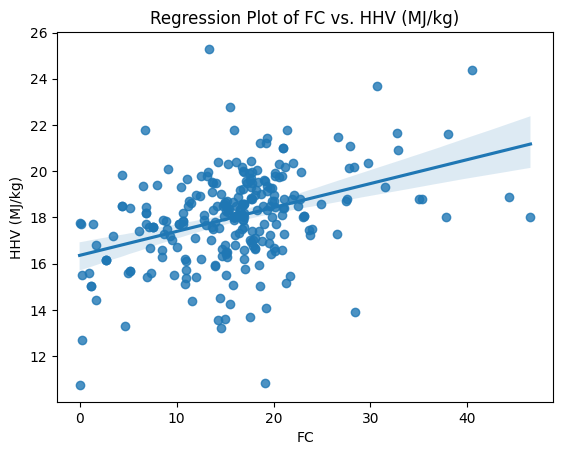

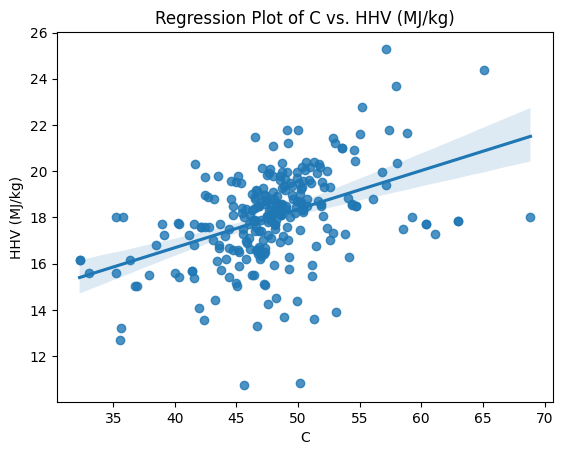

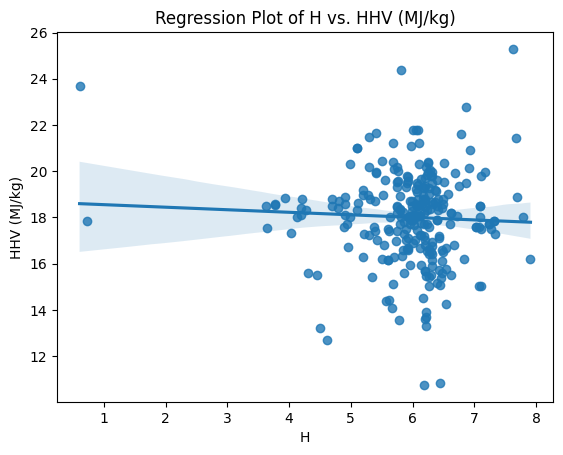

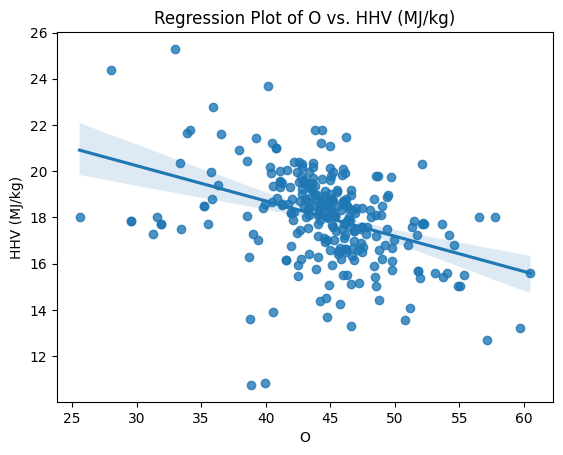

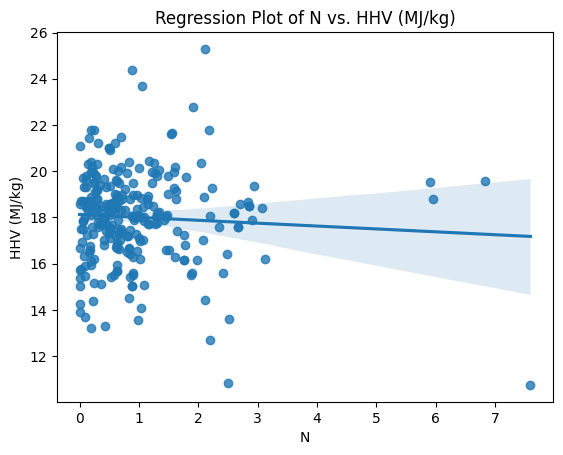

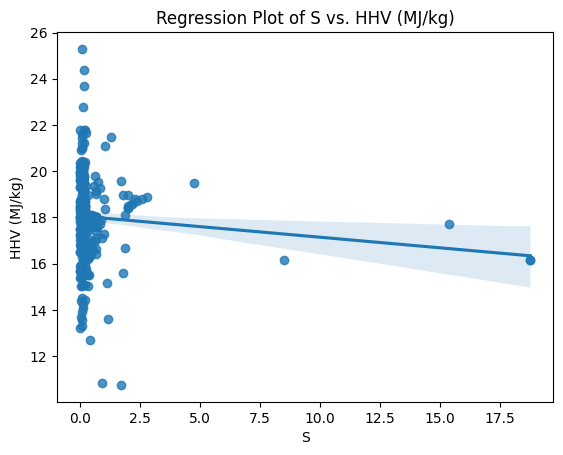

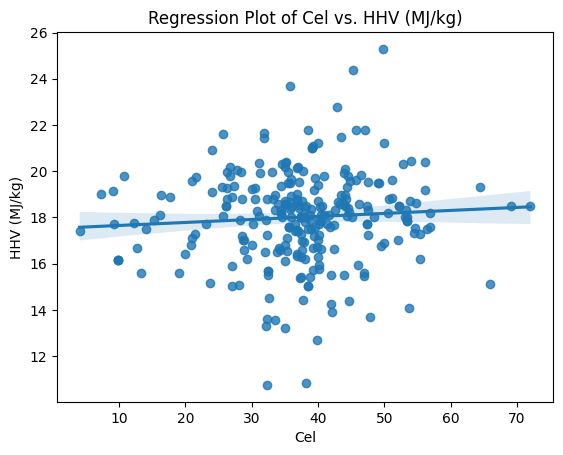

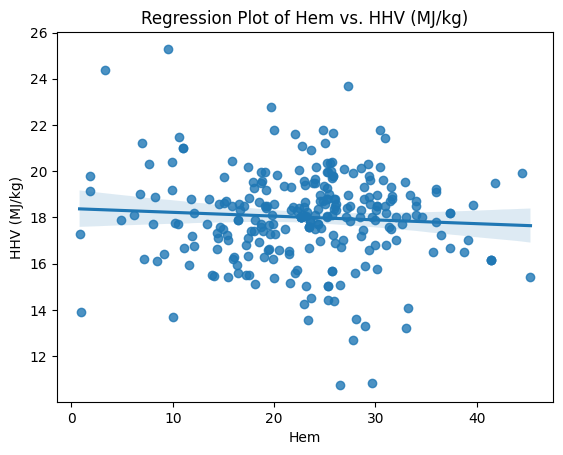

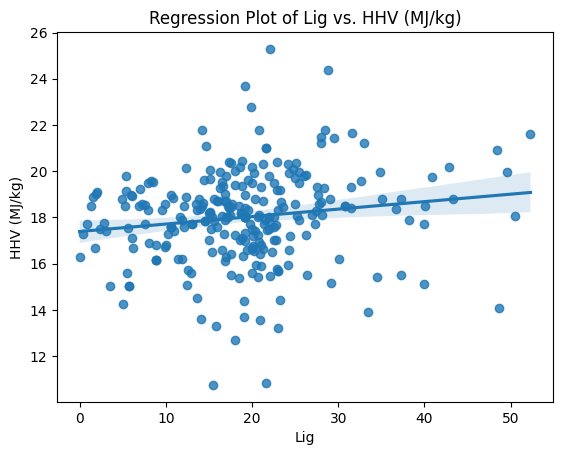

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']

# Loop through each column and create a regression plot
for column in columns_to_plot:
    sns.regplot(x=column, y='HHV (MJ/kg)', data=data)
    plt.title(f'Regression Plot of {column} vs. HHV (MJ/kg)')  # Dynamic title
    plt.show()

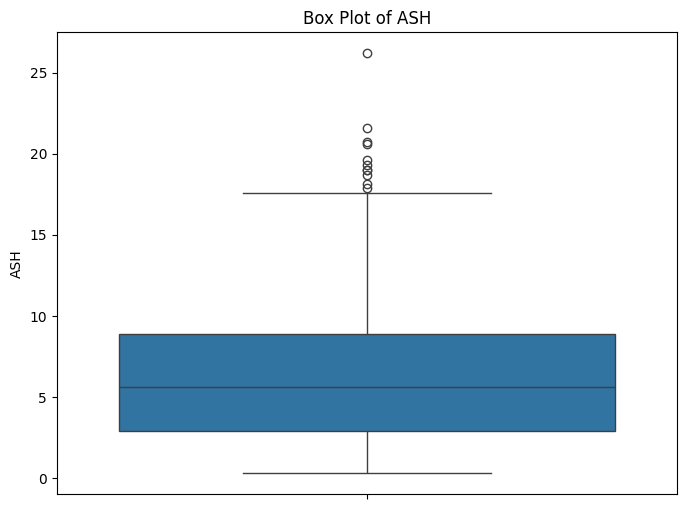

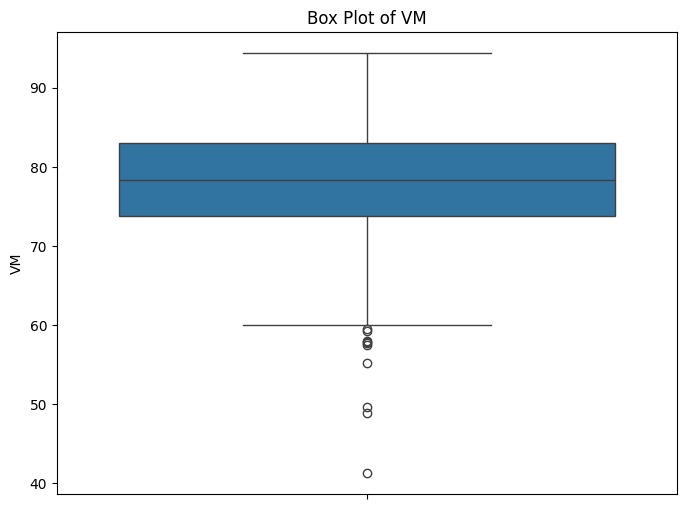

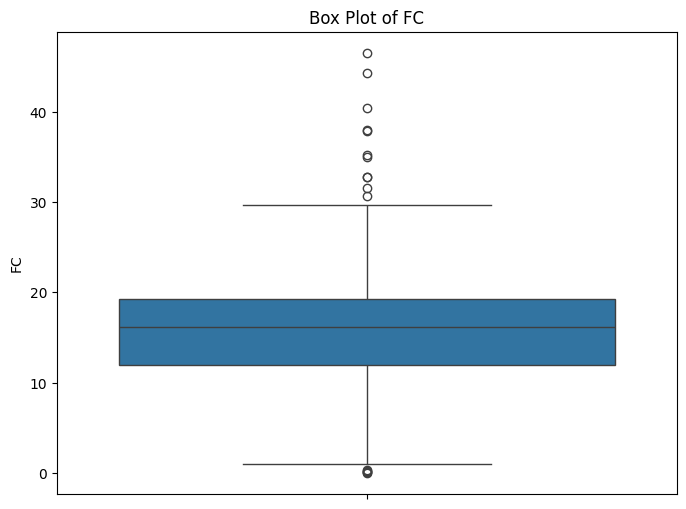

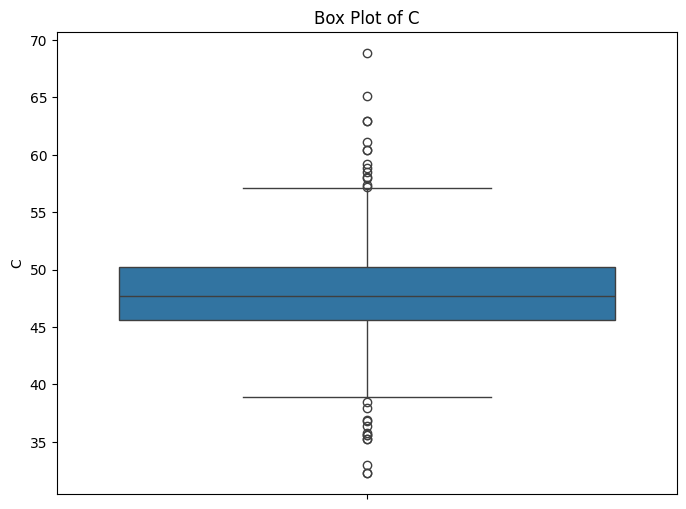

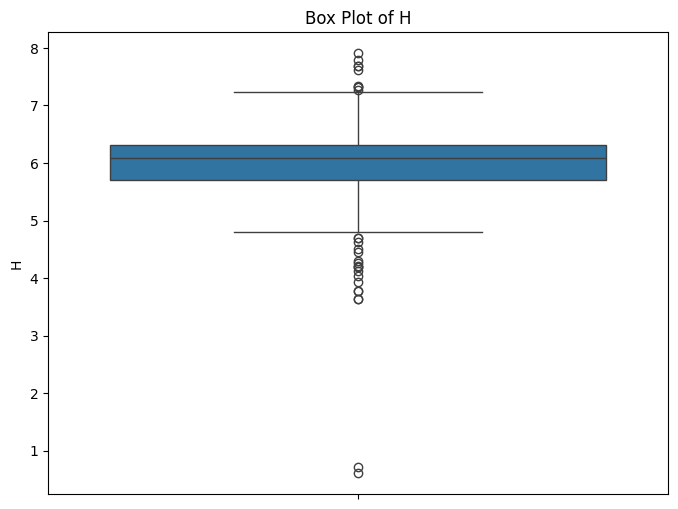

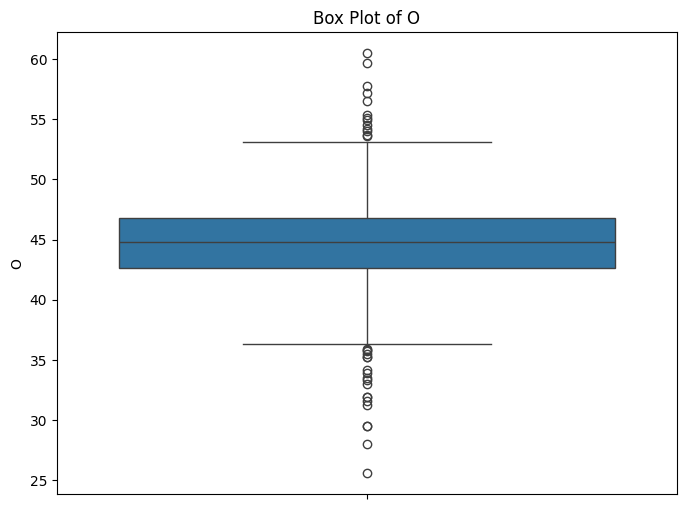

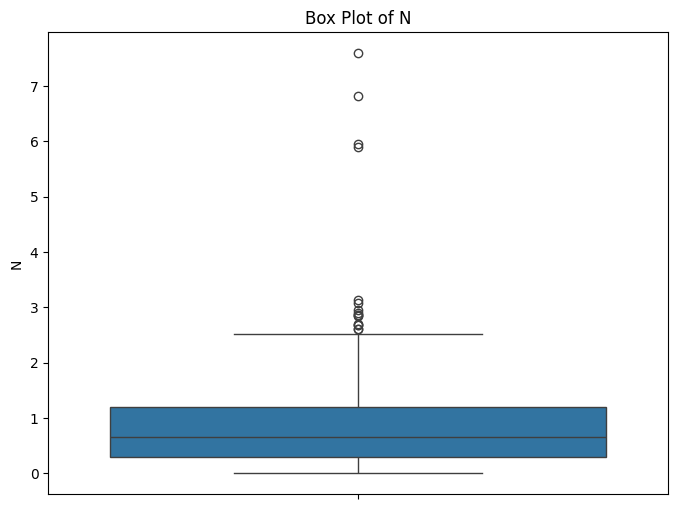

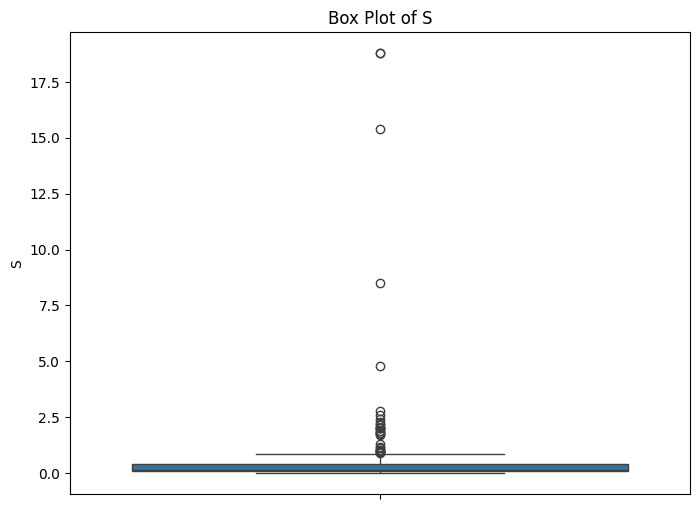

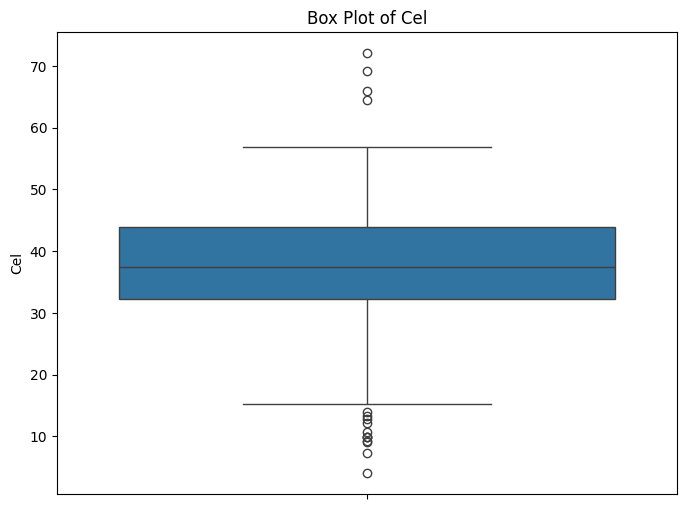

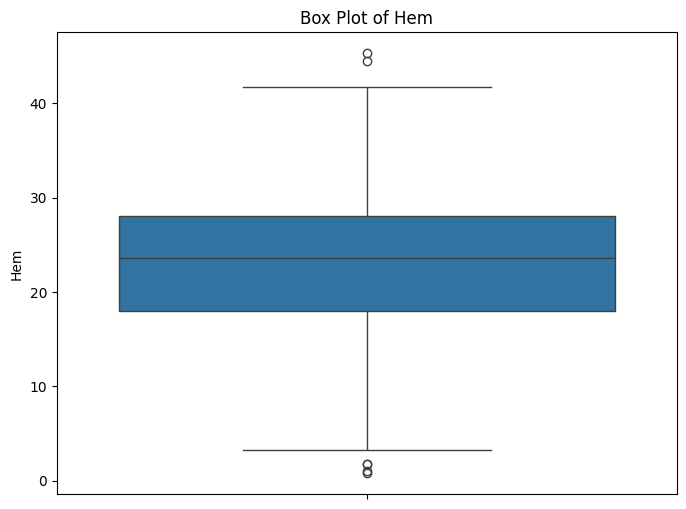

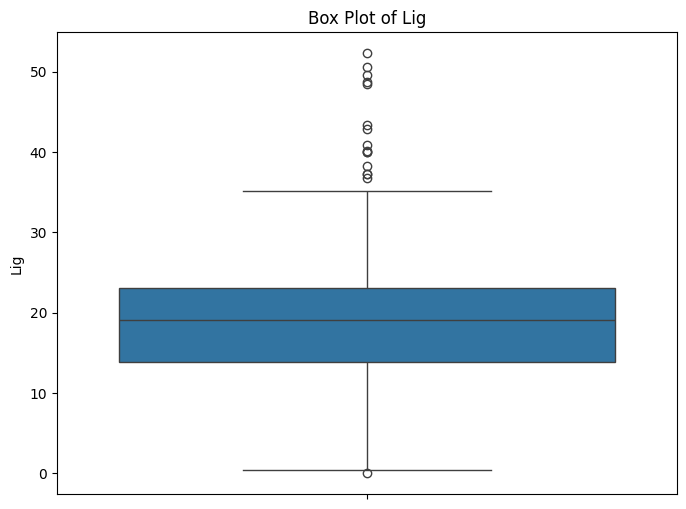

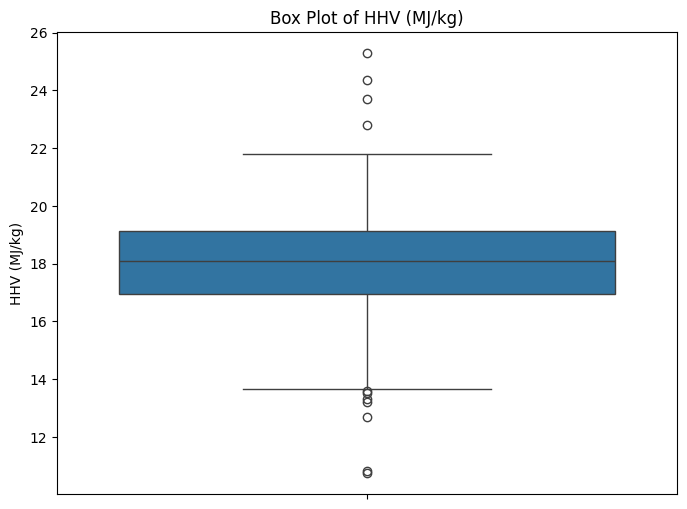

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and you want to plot box plots for all columns
# columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

To enhance model performance and ensure equal feature contribution, predictor variables were normalized using Min-Max scaling, resulting in a standardized data range between -1 and 1. This process centered the data around the mean, preventing features with larger values from dominating the model and improving the stability and interpretability of the subsequent analysis.

In [ ]:
""""from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame and 'HHV (MJ/kg)' is the target variable
columns_to_normalize = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']  # Exclude 'HHV (MJ/kg)'

# Create MinMaxScaler object with feature range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Now the selected columns are normalized between -1 and 1
"""

'"from sklearn.preprocessing import MinMaxScaler\nimport pandas as pd\n\n# Assuming \'data\' is your DataFrame and \'HHV (MJ/kg)\' is the target variable\ncolumns_to_normalize = [\'ASH\', \'VM\', \'FC\', \'C\', \'H\', \'O\', \'N\', \'S\', \'Cel\', \'Hem\', \'Lig\']  # Exclude \'HHV (MJ/kg)\'\n\n# Create MinMaxScaler object with feature range (-1, 1)\nscaler = MinMaxScaler(feature_range=(-1, 1))\n\n# Fit and transform the selected columns\ndata[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])\n\n# Now the selected columns are normalized between -1 and 1\n'

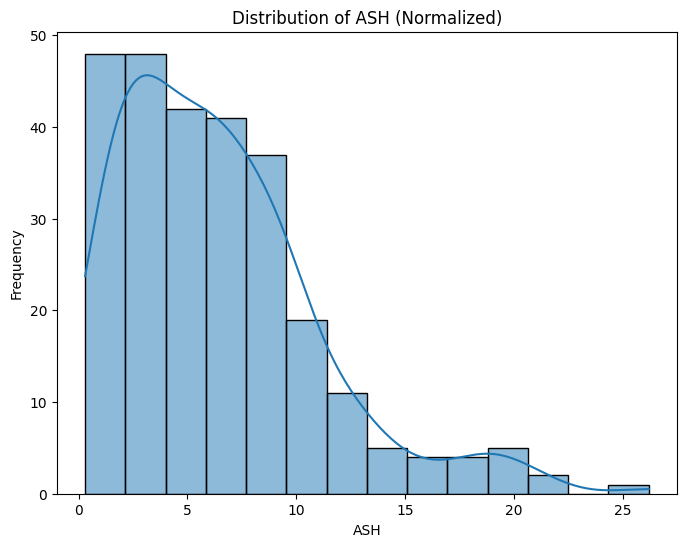

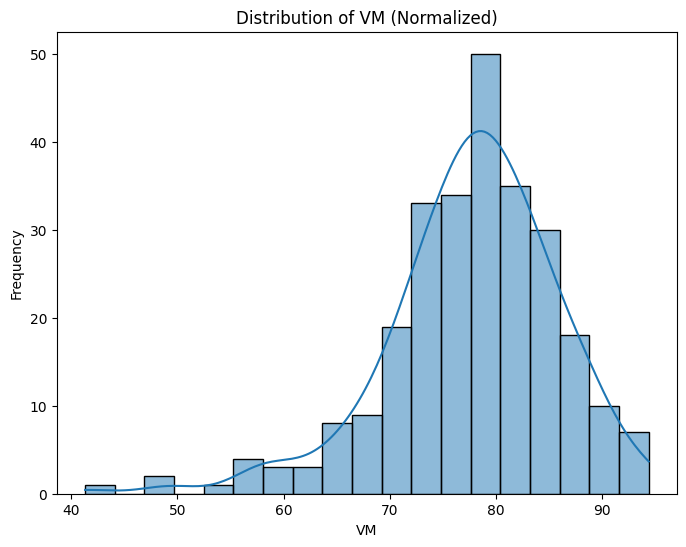

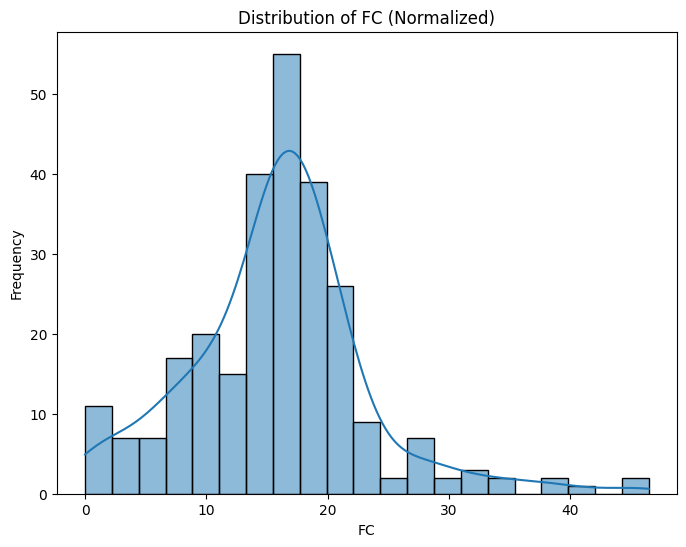

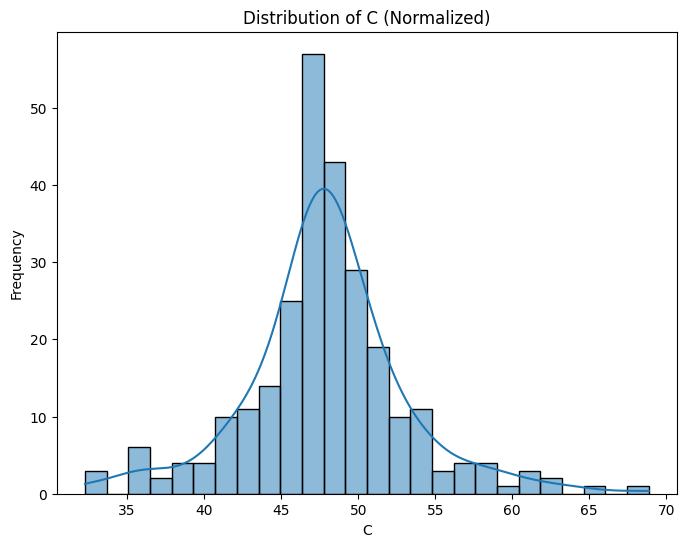

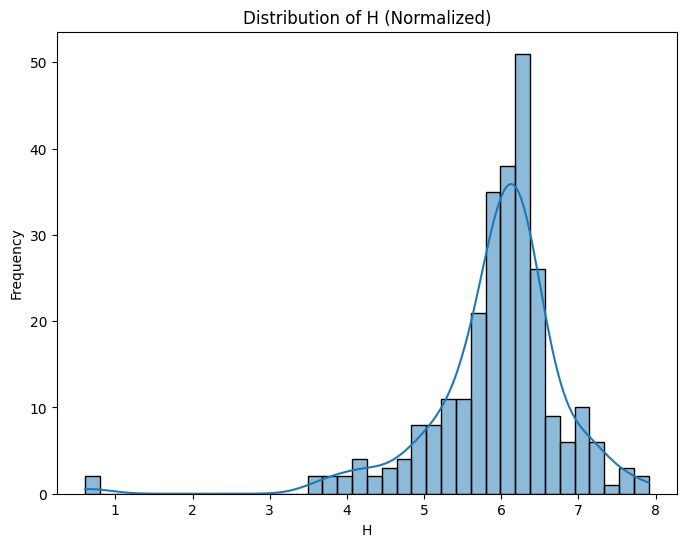

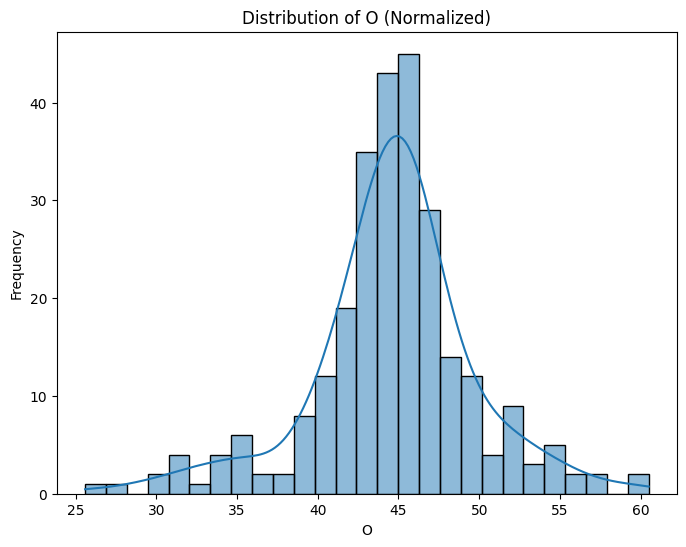

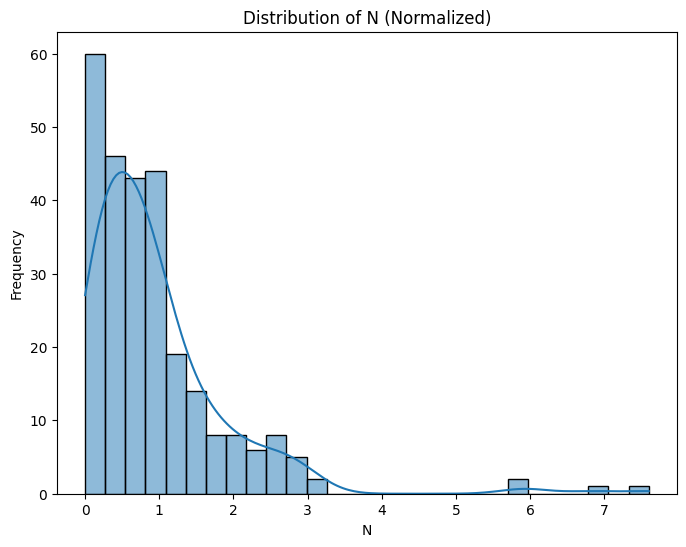

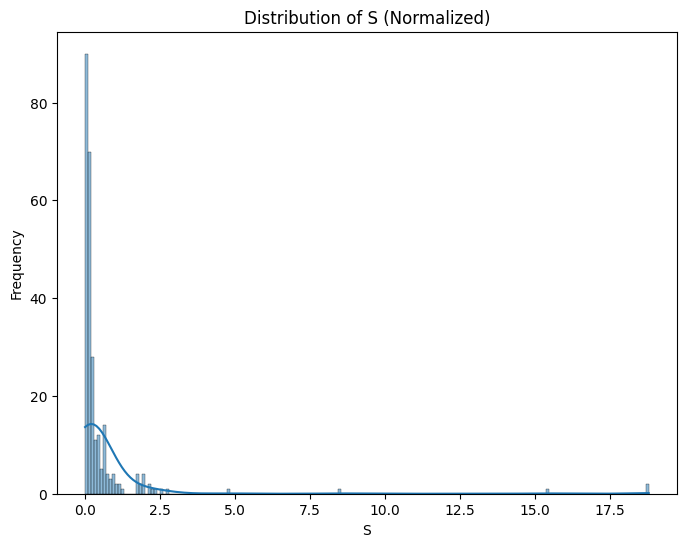

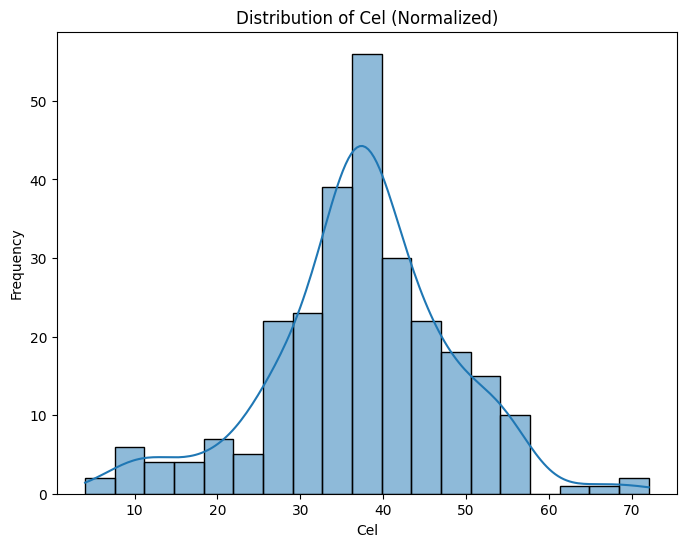

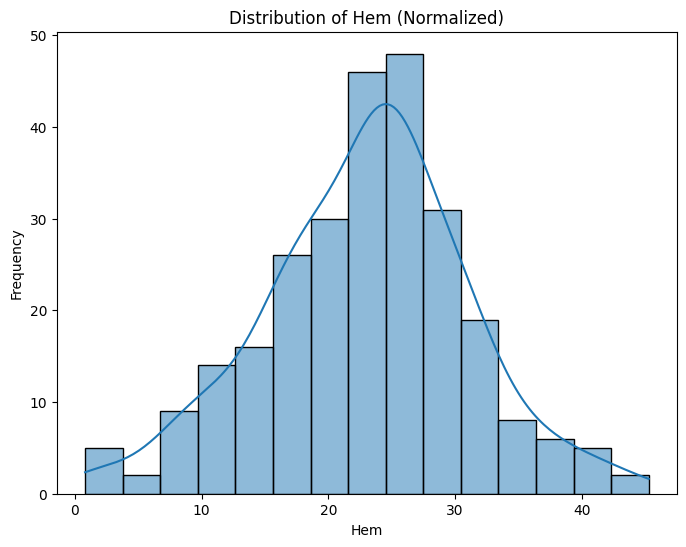

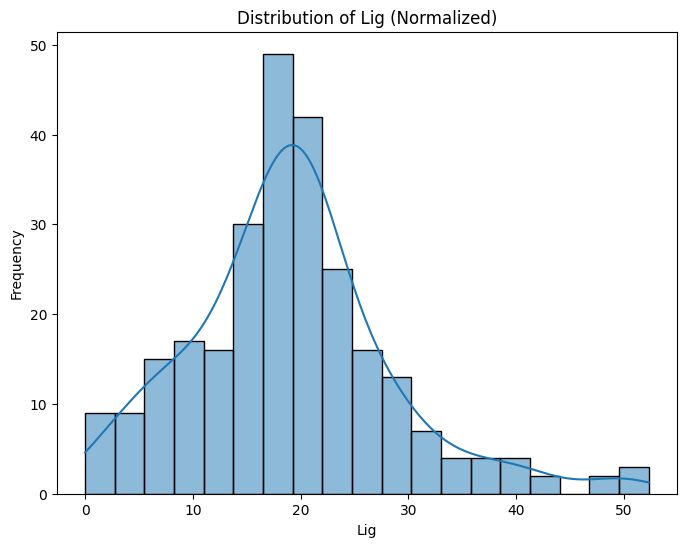

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the normalized data
# and columns_to_plot are the columns you want to visualize
# columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig'] # Exclude 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig'] # Exclude 'HHV (MJ/kg)'

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column} (Normalized)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

                  ASH        VM        FC         C         H         O  \
ASH          1.000000 -0.423677 -0.162717 -0.326535 -0.126693  0.308046   
VM          -0.423677  1.000000 -0.824802 -0.089114  0.182881  0.029580   
FC          -0.162717 -0.824802  1.000000  0.300897 -0.120123 -0.224507   
C           -0.326535 -0.089114  0.300897  1.000000  0.065137 -0.889133   
H           -0.126693  0.182881 -0.120123  0.065137  1.000000 -0.210855   
O            0.308046  0.029580 -0.224507 -0.889133 -0.210855  1.000000   
N            0.120964  0.077219 -0.159619 -0.111735  0.091108 -0.143044   
S            0.059931  0.039948 -0.080923 -0.313963 -0.108769 -0.071746   
Cel         -0.151159  0.045272  0.045042  0.303033 -0.162601 -0.140739   
Hem          0.059009  0.083927 -0.128253 -0.123778  0.033989  0.054102   
Lig          0.034525 -0.264286  0.266327  0.169225  0.059085 -0.124316   
HHV (MJ/kg) -0.479296 -0.080505  0.386875  0.441242 -0.047964 -0.394666   

                    N   

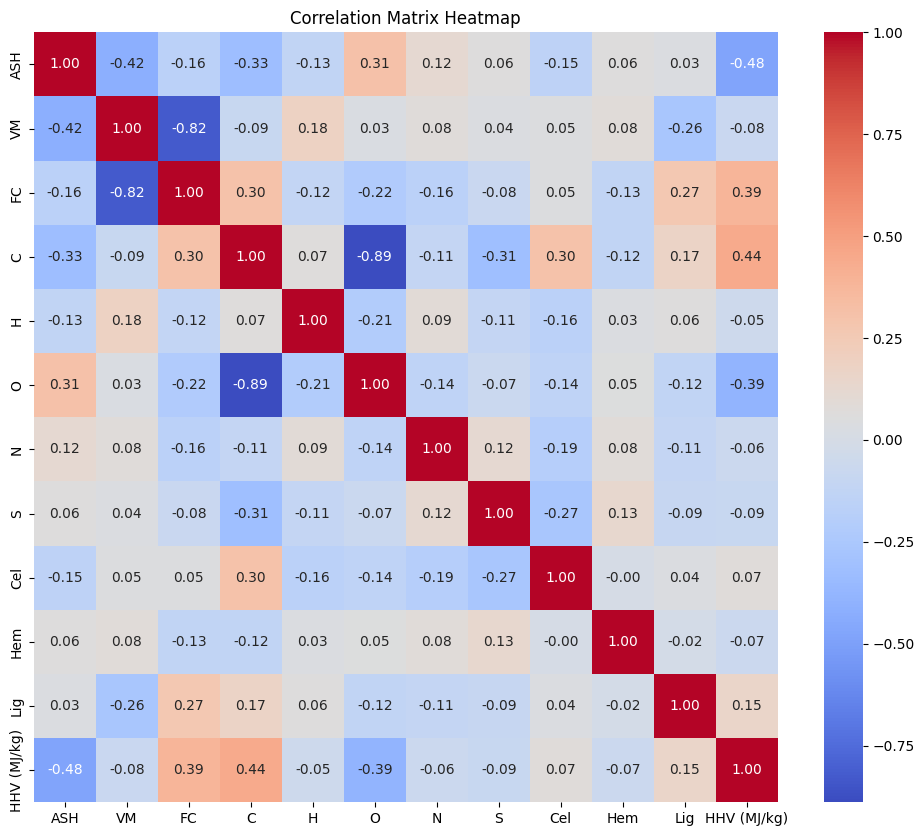

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# and you want to include all columns in the correlation matrix
# columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Calculate the correlation matrix
correlation_matrix = data[columns_for_correlation].corr()
print(correlation_matrix)  # Print the correlation matrix
# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**Step 1: Model Training, Cross-Validation, and Evaluation**

In [ ]:
!pip uninstall tf-keras

In [ ]:
!pip install tf-keras==2.18.0

In [ ]:
#!pip install tensorflow
#pip install --upgrade tensorflow
!pip install tensorflow --upgrade


ERROR: Operation cancelled by user


In [ ]:
import xgboost as xgb
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


In [ ]:
# Assuming 'data' is your DataFrame and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2


<ipython-input-41-58be0f0094d0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 325.1238
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324.7117  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.9128  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314.9830  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301.5356 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308.9800 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306.6215 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286.4914 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277.4844 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 273.4529 
Epoch 

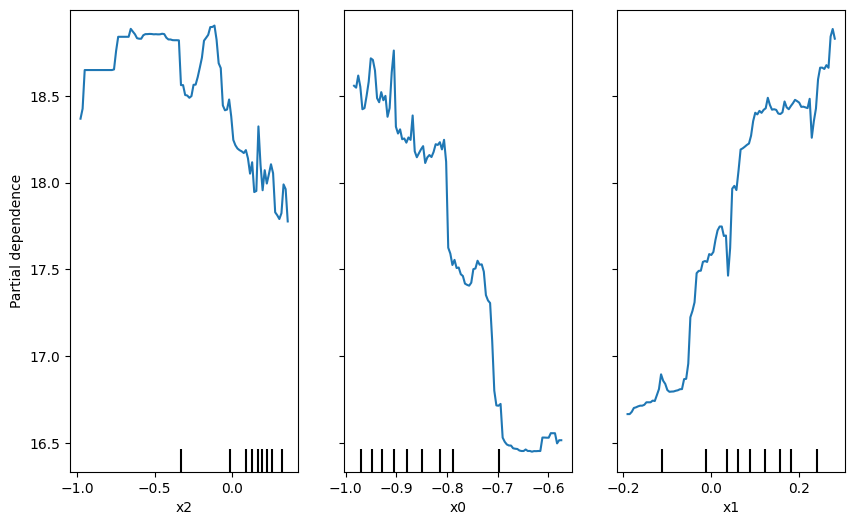

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


<ipython-input-42-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 343.5558
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.7763 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.4523 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.5919 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315.7142 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.3593 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.6742 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305.5703 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 295.0365 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.8963 
Epoch 11/

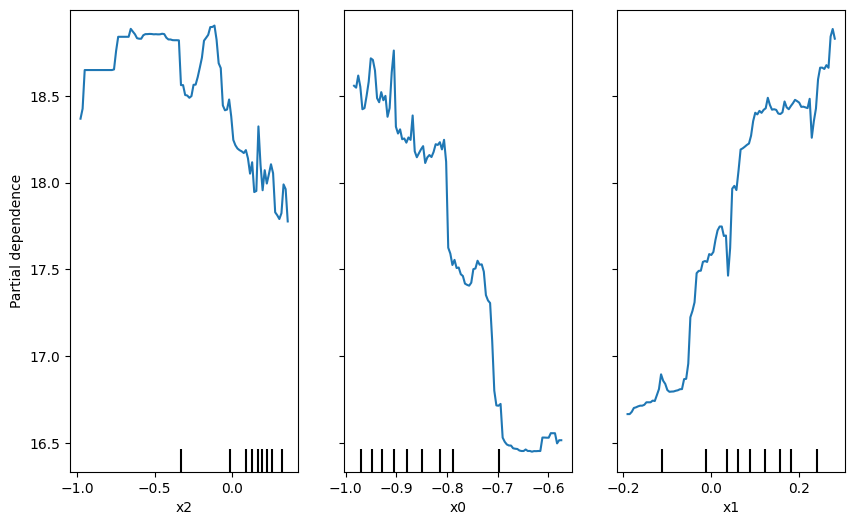

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


In [ ]:
#install polynomial features
!pip install -U scikit-learn

<ipython-input-51-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 330.9431
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328.2911  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 321.0217  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309.6455 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307.3333 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.3532  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299.2382 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286.1252 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269.5600  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250.3067  
Epoc

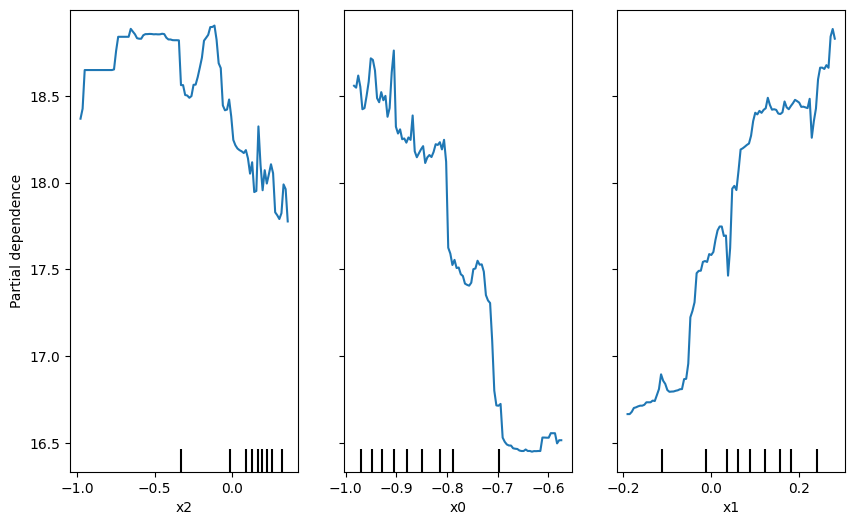

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)  # Ensure TensorFlow's randomness is also controlled

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values
X.replace('-', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)
y = y.dropna()
X = X.iloc[y.index]

# Scale features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Feature Selection
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)
X_selected = rf_selector.fit_transform(X_scaled, y)

# Split data with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

# 1. Random Forest with RandomizedSearchCV
rf_model = RandomizedSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
rf_model.fit(X_train, y_train)

# 2. XGBoost with RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Extra Trees with RandomizedSearchCV
et_model = RandomizedSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
""""def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))  # First hidden layer
    model.add(Dense(20, activation=activation))  # Second hidden layer
    model.add(Dense(20, activation=activation))  # Third hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model
"""
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')

# Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the ANN model with callbacks
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate models
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    if model_name == 'ANN':
        y_pred = model.predict(X_test).flatten()  # Flatten output for ANN
    else:
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features in Random Forest
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


NameError: name 'data' is not defined